In [25]:
import matplotlib.pyplot as plt
import numpy as np


x_outer < x_inner
[[0, 0], [0, 1.0], [1.0, 1.0], [1.0, 0.06000000000000005], [0.06000000000000005, 0.06000000000000005], [0.06000000000000005, 0.94], [0.94, 0.94], [0.94, 0.1200000000000001], [0.1200000000000001, 0.1200000000000001], [0.1200000000000001, 0.8799999999999999], [0.8799999999999999, 0.8799999999999999], [0.8799999999999999, 0.18000000000000016], [0.18000000000000016, 0.18000000000000016], [0.18000000000000016, 0.8199999999999998], [0.8199999999999998, 0.8199999999999998], [0.8199999999999998, 0.2400000000000002], [0.2400000000000002, 0.2400000000000002], [0.2400000000000002, 0.7599999999999998], [0.7599999999999998, 0.7599999999999998], [0.7599999999999998, 0.3000000000000002]]


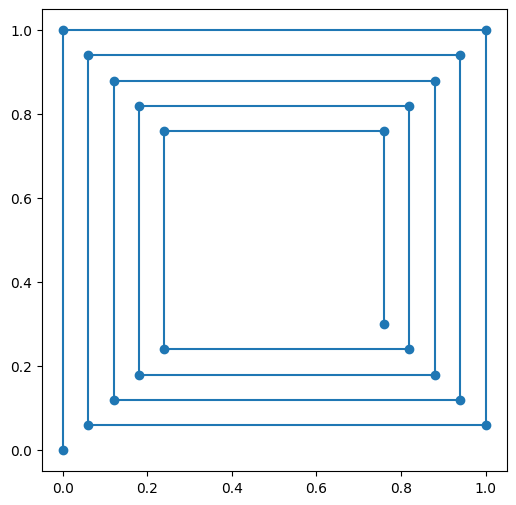

In [26]:
x_inner = 0.5 # x最小
x_outer = 1.0 # x最大
y_inner = 0.5 # y最小
y_outer = 1.0 # y最大
wire_diameter = 0.01 #線徑
num_turns = 10
x_wire_spacing = (x_outer - x_inner)/num_turns + wire_diameter # x方向線圈間距
y_wire_spacing = (y_outer - y_inner)/num_turns + wire_diameter # y方向線圈間距

coil_points = [[0,0]]
for i in range(num_turns):
    coil_points.append([coil_points[-1][0],coil_points[-1][1]+y_outer])
    coil_points.append([coil_points[-1][0]+x_outer,coil_points[-1][1]])
    y_outer -= y_wire_spacing
    coil_points.append([coil_points[-1][0],coil_points[-1][1]-y_outer]) 
    x_outer -= x_wire_spacing
    if x_outer < x_inner:
        print("x_outer < x_inner")
        break
    coil_points.append([coil_points[-1][0]-x_outer,coil_points[-1][1]])
    y_outer -= y_wire_spacing
    x_outer -= x_wire_spacing
    if y_outer < y_inner:
        print("y_outer < y_inner")
        break

print(coil_points)
plt.figure(figsize=(6,6))
coil_points = np.array(coil_points)
plt.plot(coil_points[:,0],coil_points[:,1],marker='o')

# to csv with 3d
z =1
coil_points = np.hstack((coil_points,np.full((coil_points.shape[0],1),z)))
np.savetxt("coil_coordinates.csv", coil_points, delimiter=",")

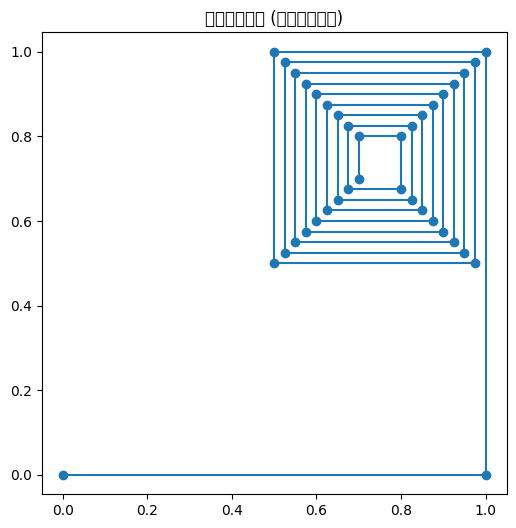

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 參數
x_inner, x_outer = 0.5, 1.0
y_inner, y_outer = 0.5, 1.0
wire_diameter = 0.01
num_turns = 10
x_spacing = (x_outer - x_inner) / (2 * num_turns)
y_spacing = (y_outer - y_inner) / (2 * num_turns)

# 初始化
coil_points = []
x_min, x_max = x_inner, x_outer
y_min, y_max = y_inner, y_outer
x, y = 0, 0      # 起點從 (0,0) 開始
coil_points.append([x, y])

# 生成螺旋路徑
for i in range(num_turns):
    x = x_max; coil_points.append([x, y])   # 右邊
    y = y_max; coil_points.append([x, y])   # 上邊
    x = x_min; coil_points.append([x, y])   # 左邊
    y = y_min; coil_points.append([x, y])   # 下邊

    # 收縮邊界
    x_min += x_spacing
    x_max -= x_spacing
    y_min += y_spacing
    y_max -= y_spacing

# 移除最後四個點，避免重複
coil_points = np.array(coil_points[:-4])

# z 設為字串
z = "d"

# 轉成字串 (x,y,z 都是字串)
coil_points_str = np.hstack((coil_points.astype(str), np.full((coil_points.shape[0],1), z)))

# 輸出 CSV
np.savetxt("coil_coordinates.csv", coil_points_str, fmt="%s", delimiter=",")

# 繪圖 (轉回 float 來畫)
plt.figure(figsize=(6,6))
plt.plot(coil_points[:,0].astype(float), coil_points[:,1].astype(float), marker='o')
plt.axis('equal')
plt.title("矩形螺旋線圈 (起點 0,0)")
plt.show()


In [51]:
print(y_spacing)

0.009000000000000001


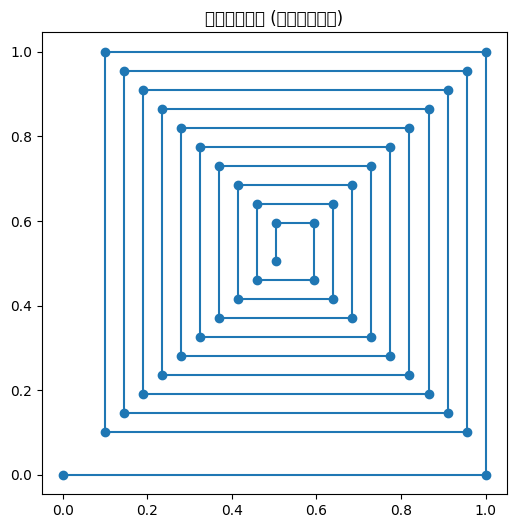

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 參數
x_inner, x_outer = 0.1, 1.0
y_inner, y_outer = 0.1, 1.0
wire_diameter = 0.01
num_turns = 10
x_spacing = (x_outer - x_inner) / (2 * num_turns)
y_spacing = (y_outer - y_inner) / (2 * num_turns)

# 初始化
coil_points = []
x_min, x_max = x_inner, x_outer
y_min, y_max = y_inner, y_outer
x, y = 0,0  # 起點從 (-x_inner, -y_inner) 開始
coil_points.append([x, y])

# 生成螺旋路徑
for i in range(num_turns):
    x = x_max; coil_points.append([x, y])   # 右邊
    y = y_max; coil_points.append([x, y])   # 上邊
    x = x_min; coil_points.append([x, y])   # 左邊
    y = y_min; coil_points.append([x, y])   # 下邊

    # 收縮邊界
    x_min += x_spacing
    x_max -= x_spacing
    y_min += y_spacing
    y_max -= y_spacing

# 移除最後四個點
coil_points = np.array(coil_points[:])



# 將 x, y, z 都轉成字串
coil_points_str = np.hstack((coil_points.astype(str), np.full((coil_points.shape[0],1), z)))
import pandas as pd
coil_df = pd.DataFrame(coil_points_str, columns=['X', 'Y', 'Z'])
#coil_df['X'] = #可以加入comsol變數
#coil_df['Y'] = #可以加入comsol變數
coil_df['Z'] = 'd'
# 輸出 CSV (全字串)
coil_df.to_csv("coil_coordinates.txt", index=False, header=False)

# 繪圖
plt.figure(figsize=(6,6))
plt.plot(coil_points[:,0].astype(float), coil_points[:,1].astype(float), marker='o')
plt.axis('equal')
plt.title("矩形螺旋線圈 (全部轉成字串)")
plt.show()
